# Strategie ewolucyjne

Notebook pokazuje podstawowe mechanizmy strategii ewolucyjnych.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib inline

## Przykładowe problemy testowe

In [2]:
# Sphere function (minimum at 0)
def objective_function_F1(X):
    return - np.sum(X**2, axis=1)

# Sphere function - modified
def objective_function_F1a(X):
    return - (X[:, 0]**2 + 9*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1b(X):
    return - (X[:, 0]**2 + 625*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1c(X):
    return - (X[:, 0]**2 + 2*X[:, 1]**2 - 2 * X[:, 0] * X[:, 1])

In [3]:
# Rastrigin function (minimum at 0)
def objective_function_F6(X):
    return - 10.0 * X.shape[1] - np.sum(X**2, axis=1) + 10.0 * np.sum(np.cos(2 * np.pi * X), axis=1)

In [4]:
# Schwefel function (minimum at 420.9687)
# (REMARK: should be considered only on [-500, 500]^d, because there are better minima outside)
def objective_function_F7(X):
    return - 418.9829 * X.shape[1] + np.sum(X * np.sin(np.sqrt(np.abs(X))), axis=1)

In [5]:
# Griewank function (minimum at 0)
def objective_function_F8(X):
    return - 1 - np.sum(X**2 / 4000, axis=1) + np.prod(np.cos(X / np.sqrt(np.linspace(1, X.shape[1], X.shape[1]))), axis=1)

In [6]:
def plot_3D_benchmark_function(objective_function, domain_X, domain_Y, title):
    plt.figure(figsize=(12, 8))
    ax = plt.gca(projection='3d')
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.hot, linewidth=0, antialiased=True)
    plt.title(title)
    plt.show()

In [7]:
def plot_contour_benchmark_function(objective_function, domain_X, domain_Y, title):
    plt.figure(figsize=(9, 9))
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
    plt.contour(X, Y, Z, 50)
    plt.title(title)
    plt.show()

C:\Anaconda2\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


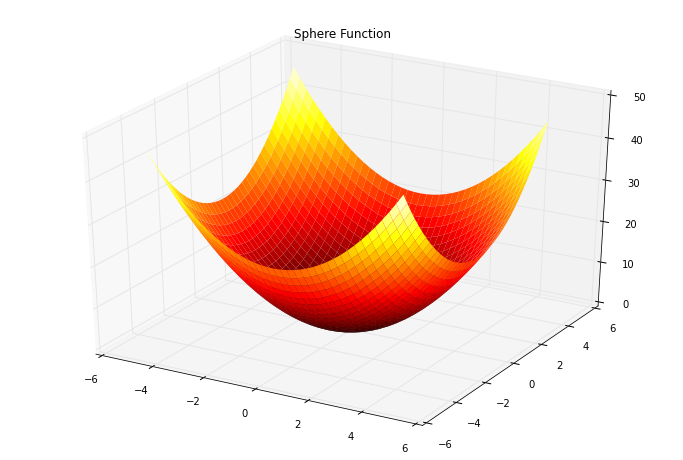

In [8]:
plot_3D_benchmark_function(objective_function_F1, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), 'Sphere Function')

C:\Anaconda2\lib\site-packages\matplotlib\collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


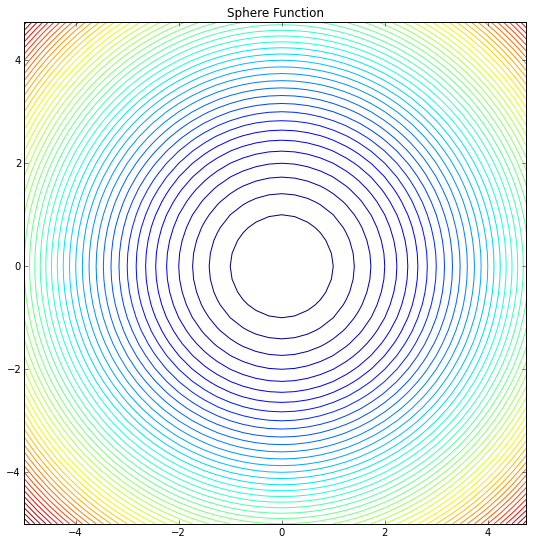

In [9]:
plot_contour_benchmark_function(objective_function_F1, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), 'Sphere Function')

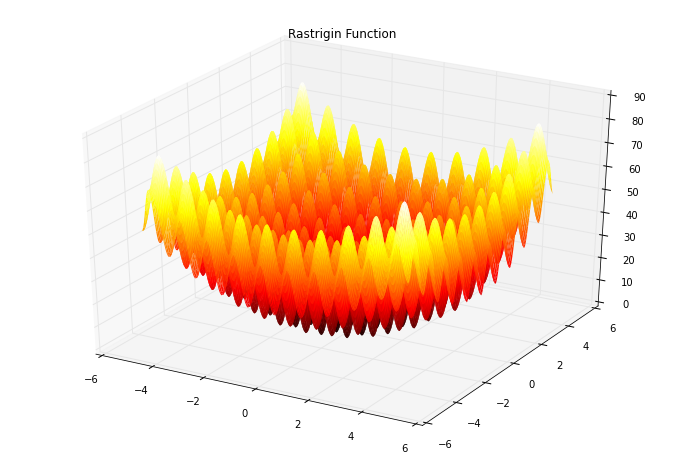

In [10]:
plot_3D_benchmark_function(objective_function_F6, np.arange(-5, 5, 0.05), np.arange(-5, 5, 0.05), 'Rastrigin Function')

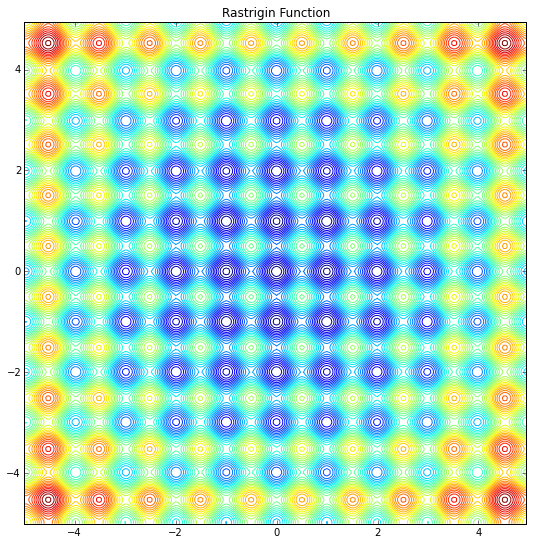

In [11]:
plot_contour_benchmark_function(objective_function_F6, np.arange(-5, 5, 0.05), np.arange(-5, 5, 0.05), 'Rastrigin Function')

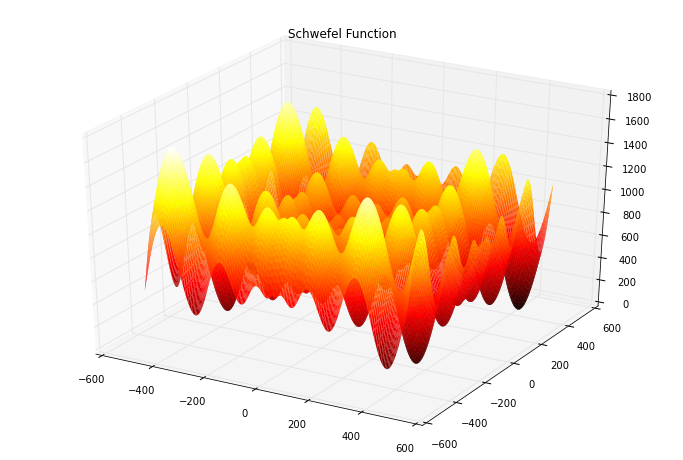

In [12]:
plot_3D_benchmark_function(objective_function_F7, np.arange(-500, 500, 5), np.arange(-500, 500, 5), 'Schwefel Function')

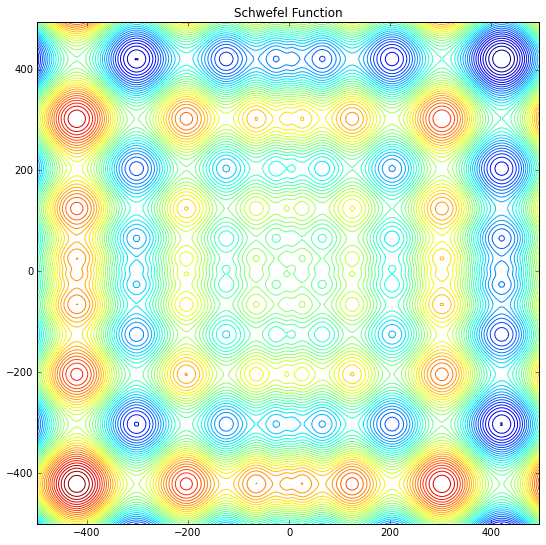

In [13]:
plot_contour_benchmark_function(objective_function_F7, np.arange(-500, 500, 5), np.arange(-500, 500, 5), 'Schwefel Function')

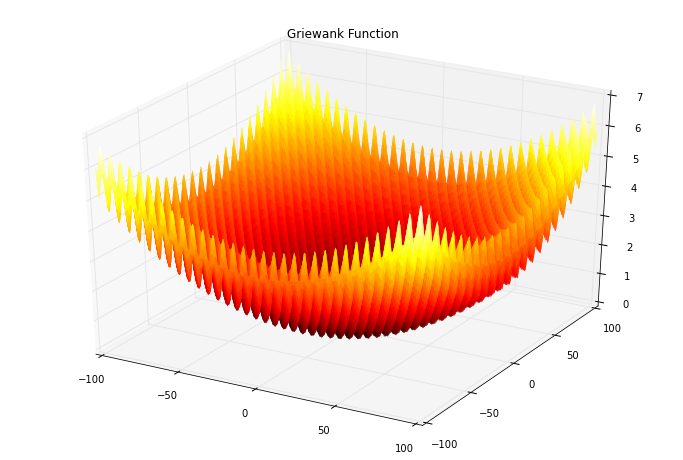

In [14]:
plot_3D_benchmark_function(objective_function_F8, np.arange(-100, 100, 0.5), np.arange(-100, 100, 0.5), 'Griewank Function')

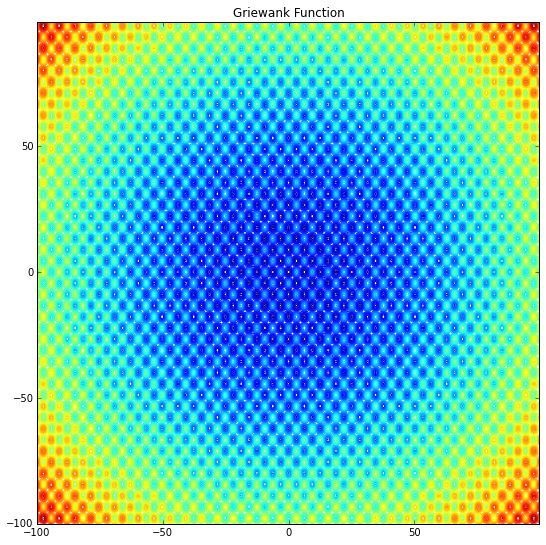

In [15]:
plot_contour_benchmark_function(objective_function_F8, np.arange(-100, 100, 0.5), np.arange(-100, 100, 0.5), 'Griewank Function')

## Przykładowe modele mutacji

In [12]:
N = 250
d = 2

objective_function = objective_function_F1

original_individual = np.array([[1, 1]])

### Przykład 1:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkład normalny $\mathcal{N}(0, \sigma^2)$, zaś $\sigma$ jest taka sama dla wszystkich $i = 1, 2, \ldots, d$

In [30]:
sigma = 0.25

orig = objective_function(original_individual)
print 'Oryginalny:', orig[0]

for i in xrange(10):
    mutations = original_individual + sigma * np.random.randn(N, d)
    mut = objective_function(mutations)
    print (mut < orig).sum() / float(mut.size) * 100, '% lepszych'
    print 'Najlepszy:', mut.min(), '\n'

Oryginalny: -2
52.4 % lepszych
Najlepszy: -4.13180795781 

52.0 % lepszych
Najlepszy: -4.45686087436 

48.8 % lepszych
Najlepszy: -4.42114144435 

49.2 % lepszych
Najlepszy: -4.20665442001 

52.0 % lepszych
Najlepszy: -4.77928907233 

56.0 % lepszych
Najlepszy: -4.39423166956 

50.0 % lepszych
Najlepszy: -4.91817933991 

53.2 % lepszych
Najlepszy: -4.8324463901 

51.6 % lepszych
Najlepszy: -4.73254324974 

59.2 % lepszych
Najlepszy: -4.66810951325 



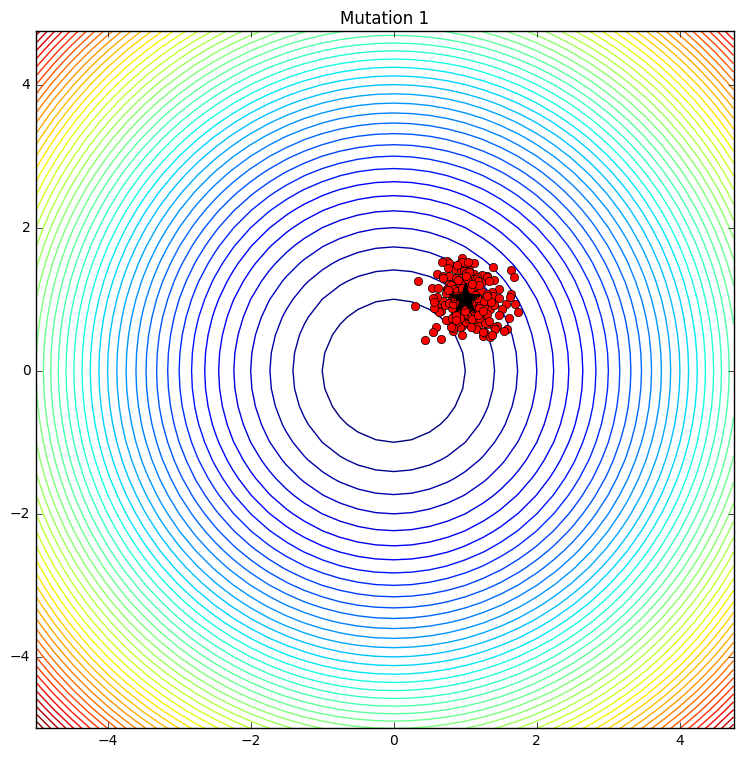

In [31]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 1')
plt.show()

### Przykład 2:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkład normalny $\mathcal{N}(0, \sigma_i^2)$, zaś $\sigma_i$ może być różna dla różnych $i = 1, 2, \ldots, d$

In [10]:
sigma = np.array([0.25, 0.5])
mutations = original_individual + sigma * np.random.randn(N, d)

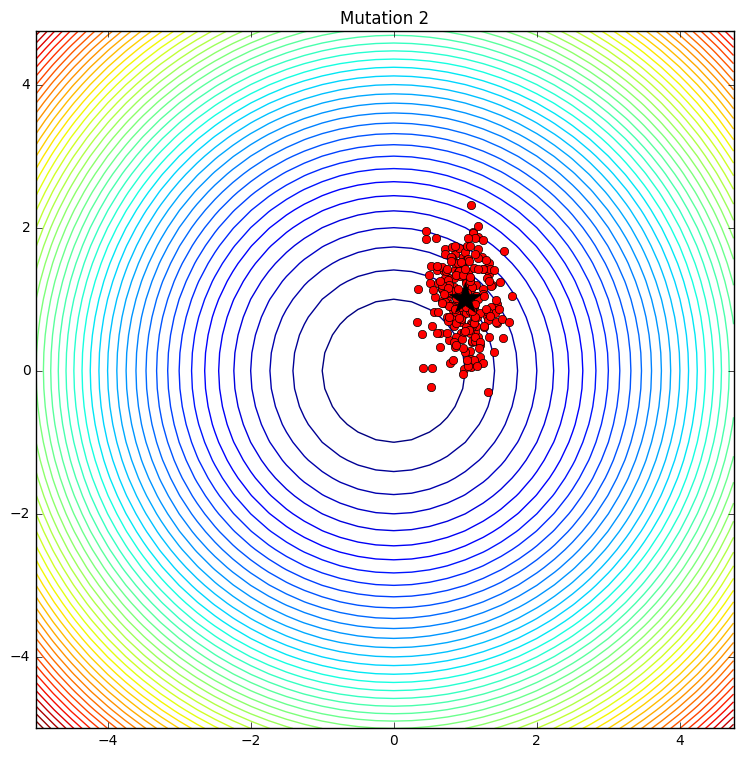

In [11]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 2')
plt.show()

### Przykład 3:

$\mathbf{x} = \mathbf{x} + \boldsymbol{\varepsilon}$, gdzie $\boldsymbol{\varepsilon}$ ma wielowymiarowy rozkład normalny $\mathcal{N}(\mathbf{0}, \boldsymbol{\Sigma})$

In [21]:
S = np.array([[0.25, 0.25],[0.25, 0.5]])
mutations = original_individual + np.dot(np.random.randn(N, d), np.linalg.cholesky(S).T)

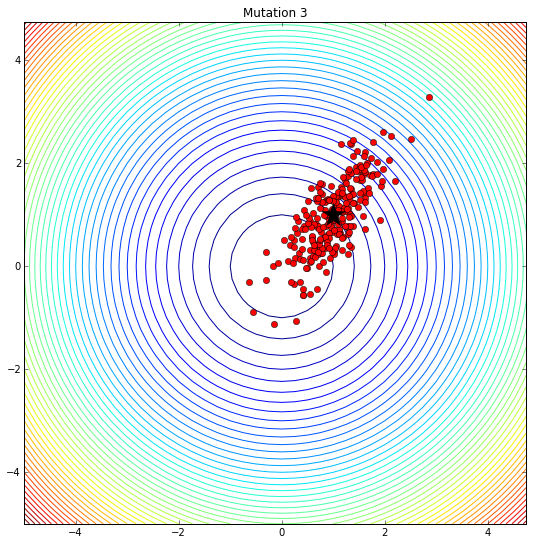

In [22]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 3')
plt.show()

## Przykładowa strategia ewolucyjna

In [7]:
def es(objective_function, chromosome_length, population_size, number_of_iterations, number_of_offspring, 
       number_of_parents, sigma, tau, tau_0, log_frequency=1, init_fn=lambda N,d: np.random.randn(N, d)):

    best_objective_value = 0.00
    best_chromosome = np.zeros((1, chromosome_length))

    history_objective_values = np.zeros((number_of_iterations, 4))
    history_best_chromosome = np.zeros((number_of_iterations, chromosome_length))
    history_best_sigmas = np.zeros((number_of_iterations, chromosome_length))

    # generating an initial population
    current_population = init_fn(population_size, chromosome_length)
    current_sigmas = sigma * np.ones((population_size, chromosome_length))

    # evaluating the objective function on the current population
    objective_values = objective_function(current_population)

    for t in xrange(number_of_iterations):

        # selecting the parent indices by the roulette wheel method
        fitness_values = (objective_values - objective_values.min()) / (objective_values - objective_values.min()).sum()
        fitness_values_cumulative = fitness_values.cumsum()
        parent_indices = np.zeros((number_of_offspring, number_of_parents), dtype=np.int32)
        for i in xrange(number_of_offspring):
            for j in xrange(number_of_parents):
                roulette = np.random.random(1)
                parent_indices[i, j] = 0
                while fitness_values_cumulative[parent_indices[i, j]] < roulette:
                    parent_indices[i, j] = parent_indices[i, j] + 1
        parent_indices = parent_indices.astype(np.int)

        '''
        tego u mnie nie było, krzyżowanie (średnia z rodziców)
        '''
        # creating the children population by Global Intermediere Recombination
        children_population = np.zeros((number_of_offspring, chromosome_length))
        children_sigmas = np.zeros((number_of_offspring, chromosome_length))
        for i in xrange(number_of_offspring):
            children_population[i, :] = current_population[parent_indices[i, :], :].mean(axis=0)
            children_sigmas[i, :] = current_sigmas[parent_indices[i, :], :].mean(axis=0)

        # mutating the children population by adding random gaussian noise
        children_sigmas = children_sigmas * np.exp(tau * np.random.randn(number_of_offspring, chromosome_length) + tau_0 * np.random.randn(number_of_offspring, 1))
        children_population = children_population + children_sigmas * np.random.randn(number_of_offspring, chromosome_length)

        # evaluating the objective function on the children population
        children_objective_values = objective_function(children_population)

        # replacing the current population by (Mu + Lambda) Replacement
        objective_values = np.hstack([objective_values, children_objective_values])
        current_population = np.vstack([current_population, children_population])
        current_sigmas = np.vstack([current_sigmas, children_sigmas])

        I = np.argsort(objective_values)[::-1]
        current_population = current_population[I[:population_size], :]
        current_sigmas = current_sigmas[I[:population_size]]
        objective_values = objective_values[I[:population_size]]

        # recording some statistics
        if best_objective_value < objective_values[0]:
            best_objective_value = objective_values[0]
            best_chromosome = current_population[0, :]
        history_objective_values[t, :] = [objective_values.min(), objective_values.max(), objective_values.mean(), objective_values.std()]
        history_best_chromosome[t, :] = current_population[0, :]
        history_best_sigmas[t, :] = current_sigmas[0, :]

        if np.mod(t, log_frequency) == 0:
            print "Iteration %04d : best score = %0.8f, mean score = %0.8f." % (t, history_objective_values[:t+1, 1].max(), history_objective_values[t, 2])

    return best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas

### Działanie strategii ewolucyjnej dla funkcji sferycznej F1

Iteration 0000 : best score = -5.06760654, mean score = -24.99722346.
Iteration 0010 : best score = -0.01015468, mean score = -0.01649443.
Iteration 0020 : best score = -0.00011157, mean score = -0.00029311.
Iteration 0030 : best score = -0.00000042, mean score = -0.00000177.
Iteration 0040 : best score = -0.00000001, mean score = -0.00000002.
Iteration 0050 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0060 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0070 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0080 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0090 : best score = -0.00000000, mean score = -0.00000000.


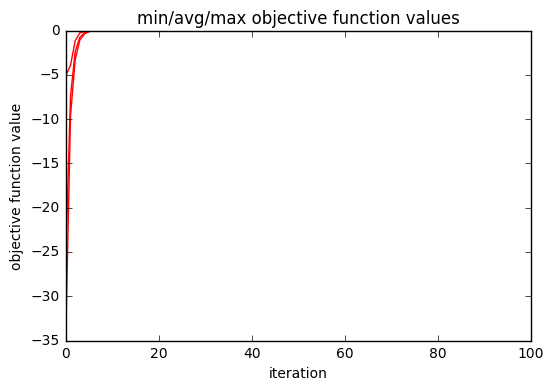

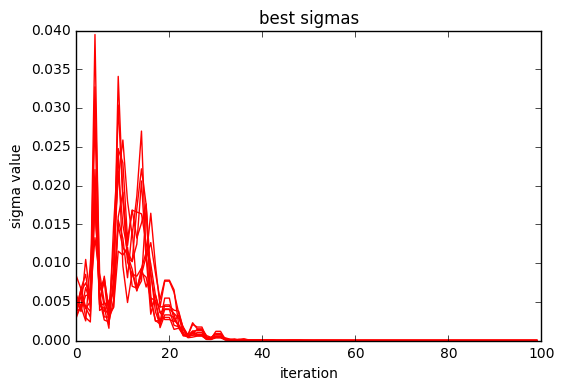

In [61]:
d = 10
N = 50
T = 100

init_fn = lambda N, d: np.random.uniform(-5.12, 5.12, size=(N, d))

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F1, d, N, T, 2*N, 2, 0.005, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10, init_fn=init_fn)

plt.figure(figsize=(6, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

### Działanie strategii ewolucyjnej dla funkcji Rastrigina F6

In [ ]:
'''
dla inicjowania N(0, 1) wszystkie wymiary poszły dobrze
'''

Iteration 0000 : best score = -52.54583229, mean score = -82.93674380.
Iteration 0010 : best score = -0.17569405, mean score = -0.38132758.
Iteration 0020 : best score = -0.00171969, mean score = -0.00455869.
Iteration 0030 : best score = -0.00002281, mean score = -0.00006456.
Iteration 0040 : best score = -0.00000029, mean score = -0.00000092.
Iteration 0050 : best score = -0.00000002, mean score = -0.00000003.
Iteration 0060 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0070 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0080 : best score = -0.00000000, mean score = -0.00000000.


/pio/lscratch/1/os/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in divide


Iteration 0090 : best score = 0.00000000, mean score = 0.00000000.


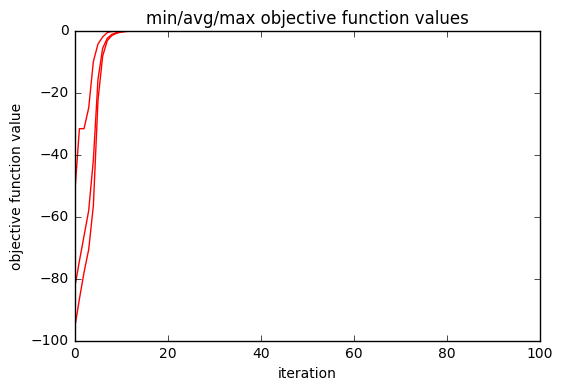

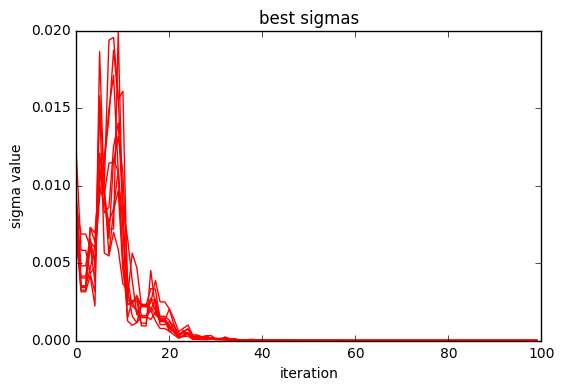

In [19]:
d = 10
N = 100
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, 2, 0.005, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(6, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -128.82486294, mean score = -176.81740073.
Iteration 0010 : best score = -24.94624746, mean score = -28.84218904.
Iteration 0020 : best score = -4.10496030, mean score = -6.57441467.
Iteration 0030 : best score = -0.41069915, mean score = -0.61304793.
Iteration 0040 : best score = -0.03900457, mean score = -0.06397937.
Iteration 0050 : best score = -0.00358864, mean score = -0.00565155.
Iteration 0060 : best score = -0.00032664, mean score = -0.00049620.
Iteration 0070 : best score = -0.00004313, mean score = -0.00006074.
Iteration 0080 : best score = -0.00000513, mean score = -0.00000782.
Iteration 0090 : best score = -0.00000072, mean score = -0.00000097.


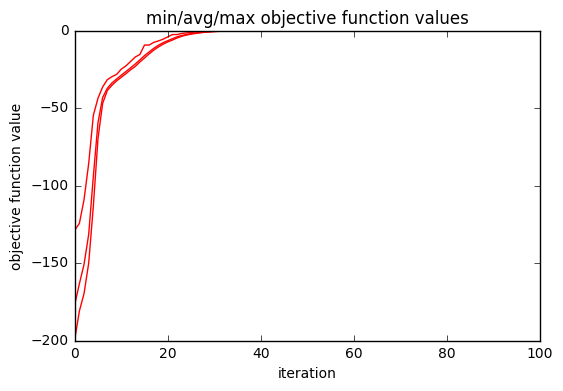

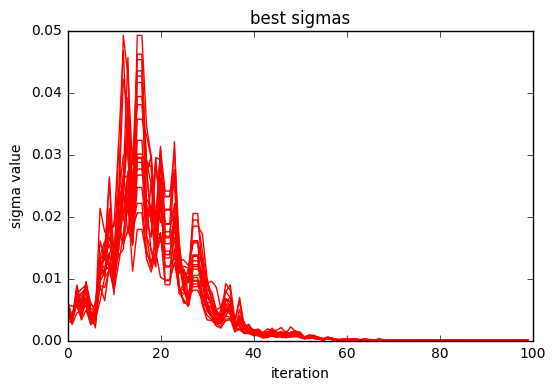

In [12]:
d = 20
N = 100
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, 2, 0.005, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(6, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -365.34619571, mean score = -482.13461130.
Iteration 0010 : best score = -89.40757952, mean score = -102.37645043.
Iteration 0020 : best score = -45.76615548, mean score = -49.96274318.
Iteration 0030 : best score = -15.99606806, mean score = -19.61143241.
Iteration 0040 : best score = -6.45388780, mean score = -7.38120999.
Iteration 0050 : best score = -2.71235083, mean score = -3.03988173.
Iteration 0060 : best score = -1.35931658, mean score = -1.48480726.
Iteration 0070 : best score = -0.61224932, mean score = -0.71199141.
Iteration 0080 : best score = -0.32057107, mean score = -0.35169381.
Iteration 0090 : best score = -0.15017103, mean score = -0.16774853.
Iteration 0100 : best score = -0.07529400, mean score = -0.08478457.
Iteration 0110 : best score = -0.03899889, mean score = -0.04462243.
Iteration 0120 : best score = -0.02154721, mean score = -0.02370528.
Iteration 0130 : best score = -0.01051186, mean score = -0.01175012.
Iteration 0140 : best s

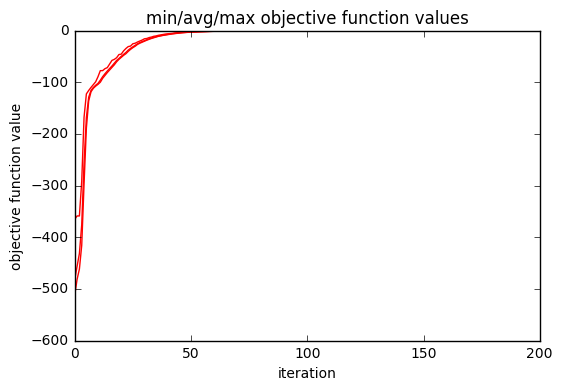

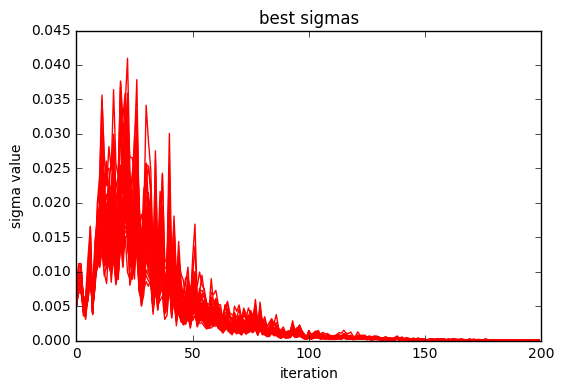

In [47]:
d = 50
N = 100
T = 200

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, 2, 0.005, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(6, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -829.70824853, mean score = -979.13697690.
Iteration 0010 : best score = -275.33553467, mean score = -282.06558876.
Iteration 0020 : best score = -211.78239141, mean score = -224.76591352.
Iteration 0030 : best score = -131.16516428, mean score = -139.43064301.
Iteration 0040 : best score = -81.81280208, mean score = -86.15571852.
Iteration 0050 : best score = -51.90415140, mean score = -54.72087327.
Iteration 0060 : best score = -31.17036317, mean score = -33.93018708.
Iteration 0070 : best score = -17.93365751, mean score = -19.44013132.
Iteration 0080 : best score = -10.12594134, mean score = -11.29830604.
Iteration 0090 : best score = -6.35853509, mean score = -7.02041518.
Iteration 0100 : best score = -3.70478402, mean score = -4.07885994.
Iteration 0110 : best score = -2.20175395, mean score = -2.45201202.
Iteration 0120 : best score = -1.40997726, mean score = -1.50242601.
Iteration 0130 : best score = -0.87771397, mean score = -0.92747747.
Iteratio

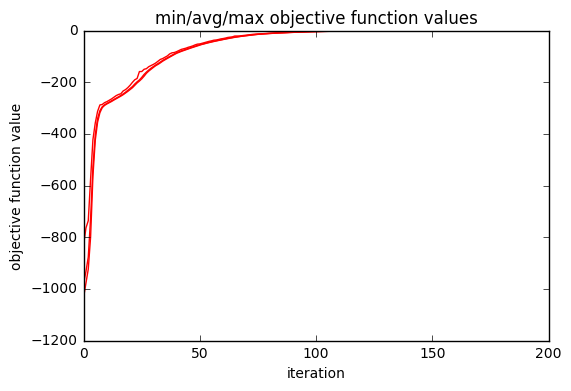

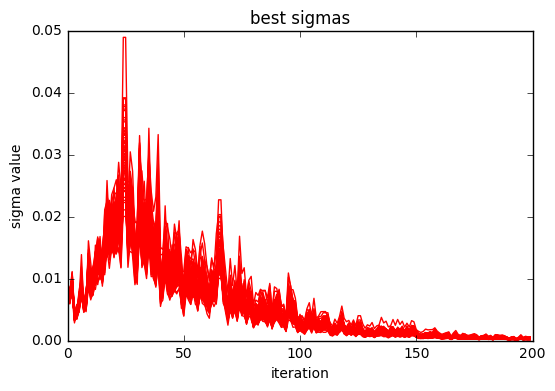

In [49]:
d = 100
N = 150
T = 200

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, 2, 0.005, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(6, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

Iteration 0000 : best score = -141.61489507, mean score = -218.22538768.
Iteration 0010 : best score = -141.61489507, mean score = -218.22538768.
Iteration 0020 : best score = -141.61489507, mean score = -218.22538768.
Iteration 0030 : best score = -141.61489507, mean score = -218.22538768.
Iteration 0040 : best score = -141.61489507, mean score = -218.22538768.
Iteration 0050 : best score = -141.61489507, mean score = -218.22538768.
Iteration 0060 : best score = -141.61489507, mean score = -218.22538768.
Iteration 0070 : best score = -141.61489507, mean score = -218.22538768.
Iteration 0080 : best score = -141.61489507, mean score = -218.22538768.
Iteration 0090 : best score = -141.61489507, mean score = -218.22538768.


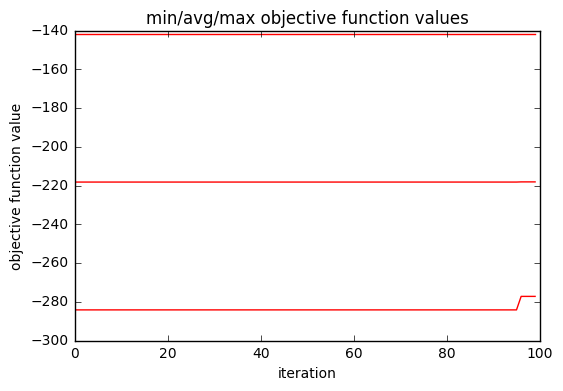

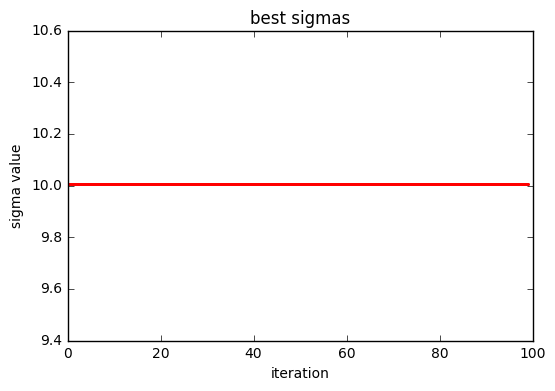

In [40]:
d = 20
N = 100
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, 2, 10.005, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(6, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

In [ ]:
'''
a teraz z właściwym initem (jednostajnym)
'''

Iteration 0000 : best score = -83.60054944, mean score = -125.67464422.
Iteration 0010 : best score = -37.53545737, mean score = -64.91902171.
Iteration 0020 : best score = -29.30324420, mean score = -54.02721802.
Iteration 0030 : best score = -0.89297949, mean score = -2.91458679.
Iteration 0040 : best score = -0.01905249, mean score = -0.05428265.
Iteration 0050 : best score = -0.00015956, mean score = -0.00051564.
Iteration 0060 : best score = -0.00000216, mean score = -0.00000441.
Iteration 0070 : best score = -0.00000002, mean score = -0.00000006.
Iteration 0080 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0090 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0100 : best score = 0.00000000, mean score = -0.00000000.
Iteration 0110 : best score = 0.00000000, mean score = 0.00000000.


/pio/lscratch/1/os/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in divide


Iteration 0120 : best score = 0.00000000, mean score = 0.00000000.
Iteration 0130 : best score = 0.00000000, mean score = 0.00000000.
Iteration 0140 : best score = 0.00000000, mean score = 0.00000000.
Iteration 0150 : best score = 0.00000000, mean score = 0.00000000.
Iteration 0160 : best score = 0.00000000, mean score = 0.00000000.
Iteration 0170 : best score = 0.00000000, mean score = 0.00000000.
Iteration 0180 : best score = 0.00000000, mean score = 0.00000000.
Iteration 0190 : best score = 0.00000000, mean score = 0.00000000.


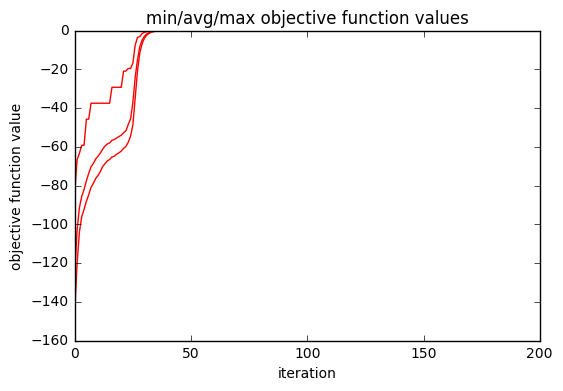

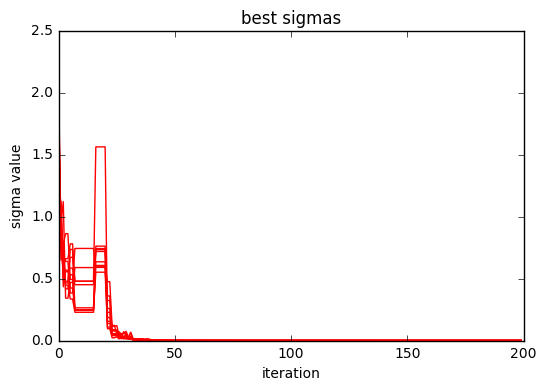

In [32]:
# tutaj miał spore szczęście, zwykle kończył na wartości w [1,5]

d = 10
N = 100
T = 200

init_fn = lambda N, d: np.random.uniform(-5.12, 5.12, size=(N, d))

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, 2, 1.005, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10, init_fn=init_fn)

plt.figure(figsize=(6, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

In [42]:
d = 20
N = 2000
T = 200

init_fn = lambda N, d: np.random.uniform(-5.12, 5.12, size=(N, d))

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 3*N, 2, .005, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10, init_fn=init_fn)

plt.figure(figsize=(6, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

KeyboardInterrupt: 

### Działanie strategii ewolucyjnej dla funkcji Schwefela F7 - podejście pierwsze

Iteration 0000 : best score = -4109.66524856, mean score = -4179.68216220.
Iteration 0010 : best score = -2363.01399676, mean score = -3426.10881205.
Iteration 0020 : best score = 61322.67381168, mean score = 10473.57435830.
Iteration 0030 : best score = 1592344.27255633, mean score = 483159.72148985.
Iteration 0040 : best score = 101447464.02579907, mean score = 23803147.63942507.
Iteration 0050 : best score = 2190951683.83655453, mean score = 815644616.53048670.
Iteration 0060 : best score = 21345142309.01692963, mean score = 9696079463.37831306.
Iteration 0070 : best score = 272218569440.87551880, mean score = 83304564515.05538940.
Iteration 0080 : best score = 1708417786579.37158203, mean score = 836263456590.28222656.
Iteration 0090 : best score = 68800883334932.62500000, mean score = 17027831812551.25976562.


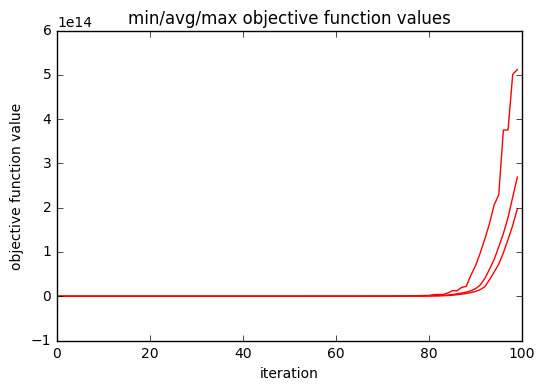

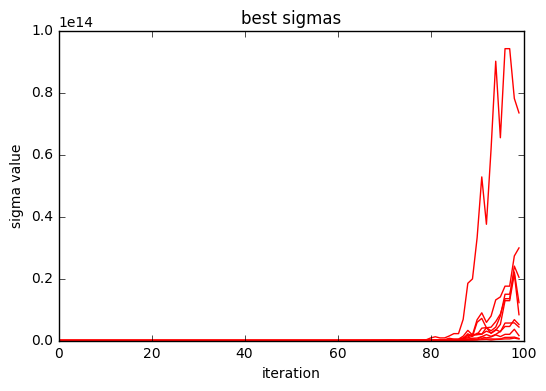

In [56]:
d = 10
N = 200
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F7, d, N, T, 2*N, 2, 5.005, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(6, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

In [58]:
best_chromosome

array([  5.61541132e+12,  -7.23852685e+11,   4.42280823e+13,
         4.59911312e+13,   4.67130909e+12,   3.73606955e+12,
         1.56033544e+13,   4.98733143e+14,  -1.46732538e+12,
        -4.22019630e+12])

### Działanie strategii ewolucyjnej dla funkcji Schwefela F7 - podejście drugie

W pierwszym podejściu algorytm nie znajdował dobrych rozwiązań - utykał w ekstremum lokalnym. Powodem prawdopodobnie był zbyt mały zasięg mutacji (zbyt mała początkowa wartość parametru sigma), przez co algorytm miał trudność z przemieszczeniem populacji w okolice ekstremum globalnego (patrz wykres funkcji Schwefela). Spróbujmy zwiększyć wartość parametru sigma z 0.005 do 5.0.

Iteration 0000 : best score = -4122.11577421, mean score = -4178.73319525.
Iteration 0010 : best score = -3659.24800690, mean score = -3916.99750289.
Iteration 0020 : best score = 3431.96238181, mean score = -2273.73986016.
Iteration 0030 : best score = 221316.34793996, mean score = 65781.56065612.
Iteration 0040 : best score = 1781619.73055337, mean score = 805951.24590036.
Iteration 0050 : best score = 53677461.32750959, mean score = 24992247.02175435.
Iteration 0060 : best score = 786171502.79658580, mean score = 323832131.55443794.
Iteration 0070 : best score = 3006073074.18310976, mean score = 2177423629.00506210.
Iteration 0080 : best score = 20704425174.71773148, mean score = 12207571123.54004097.
Iteration 0090 : best score = 294876179332.32318115, mean score = 114281900897.51081848.


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:27: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


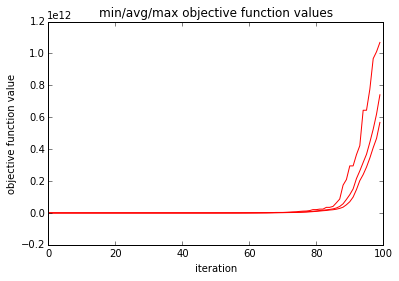

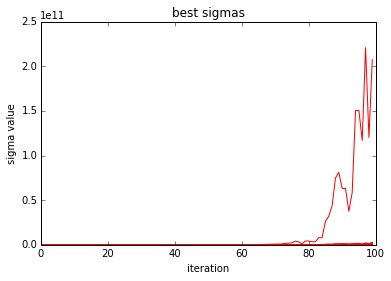

In [27]:
d = 10
N = 50
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F7, d, N, T, 2*N, 2, 5.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(6, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()

#### UWAGA:

Funkcja Schwefela powinna być rozważana jedynie w kostce D = [-500, 500]^d, w której ma minimum 0, bo poza tą kostką ma niższe minima. Używana strategia ewolucyjna nie ogranicza osobników do kostki D, a więc w wyniku ewolucji pojawiają się osobniki spoza kostki D, które mają niższe wartości funkcji celu niż minimum na kostce D.

### Działanie strategii ewolucyjnej dla funkcji Griewanka F8

Iteration 0000 : best score = -0.06845413, mean score = -0.28281000.
Iteration 0010 : best score = -0.00058809, mean score = -0.00110732.
Iteration 0020 : best score = -0.00004031, mean score = -0.00005514.
Iteration 0030 : best score = -0.00000281, mean score = -0.00000491.
Iteration 0040 : best score = -0.00000014, mean score = -0.00000024.
Iteration 0050 : best score = -0.00000000, mean score = -0.00000001.
Iteration 0060 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0070 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0080 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0090 : best score = -0.00000000, mean score = -0.00000000.

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:27: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: invalid value encountered in divide


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:27: RuntimeWarning: invalid value encountered in less


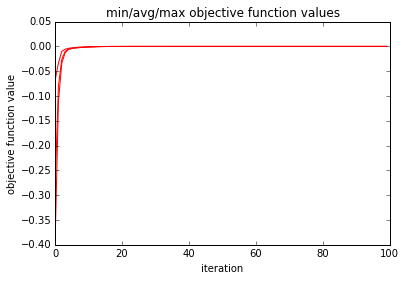

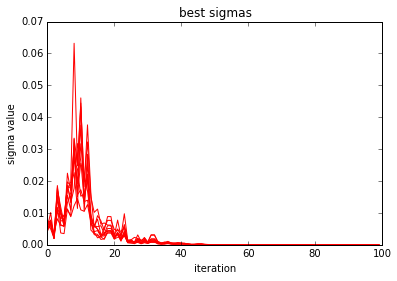

In [28]:
d = 10
N = 50
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F8, d, N, T, 2*N, 2, 0.005, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(6, 4))
plt.plot(history_objective_values[:, 0], 'r-')
plt.plot(history_objective_values[:, 1], 'r-')
plt.plot(history_objective_values[:, 2], 'r-')
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.show()